<a href="https://colab.research.google.com/github/MuhammadAhsanBughio/Stock-Market-Forecasting/blob/main/Stock_Market_Forecasting_PPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#Installing Pakistan Stock Exchange Data Reader
!pip install psx-data-reader


In [9]:
# Importing Stocks and Tickers from PSX
from psx import stocks, tickers


In [10]:
# Getting the information of all the companies in Pakistan Stock Exchange
tickers = tickers()


To scrape the data of Pakistan Petrolium Limited we have passed its ticker (symbol) to the stocks method with proper start and end date. and it will return a DataFrame with the scraped data



In [11]:
#importing datatime module
import datetime

In [12]:
df = stocks("PPL", start=datetime.date(2020, 1, 1), end=datetime.date.today())


In [6]:
import pandas as pd

In [49]:
df.head()

,Open,High,Low,Close,Volume
0,137.24,138.80,137.0,138.27,1287600.0
1,139.00,144.50,138.1,142.79,8125900.0
2,145.50,146.48,142.0,143.20,5020900.0
3,141.99,142.50,139.0,139.98,2662600.0
4,140.45,142.00,138.0,140.40,1777200.0


In [50]:
#Saving the file to CSV
df.to_csv("/content/PPL_Stock_Prices.csv", index=False)


In [51]:
file_path = "/content/PPL_Stock_Prices.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,Open,High,Low,Close,Volume
0,137.24,138.80,137.0,138.27,1287600.0
1,139.00,144.50,138.1,142.79,8125900.0
2,145.50,146.48,142.0,143.20,5020900.0
3,141.99,142.50,139.0,139.98,2662600.0
4,140.45,142.00,138.0,140.40,1777200.0


In [16]:
from google.colab import files

files.download("/content/PPL_Stock_Prices.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
# Closing prices of the stock
df1=df.reset_index()['Close']

In [53]:
df1


0       138.27
1       142.79
2       143.20
3       139.98
4       140.40
         ...  
1036    114.20
1037    114.35
1038    115.30
1039    114.93
1040    114.62
Name: Close, Length: 1041, dtype: float64

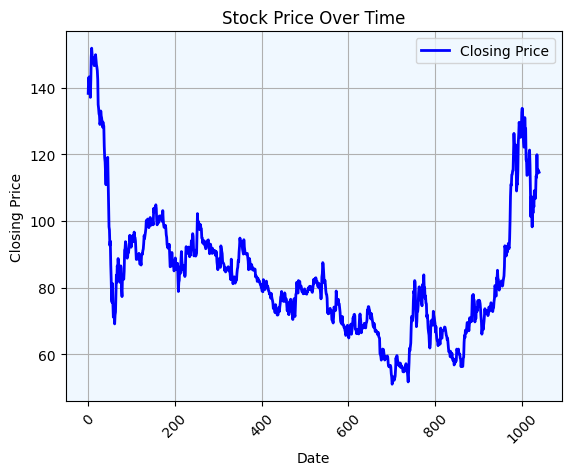

In [54]:
import matplotlib.pyplot as plt

# Plotting the line
plt.plot(df1, label='Closing Price', color='blue', linestyle='-', linewidth=2)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better visualization
plt.grid(True)
# Adding background colour
plt.rcParams['axes.facecolor'] = 'aliceblue'

# Display the plot
plt.show()


LSTM are sensitive to the scale of the data. so we apply MinMax scaler


In [55]:
# Importing necessary libraries
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Creating an instance of MinMaxScaler with the feature range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Reshaping the data to a single column and applying Min-Max scaling
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))
# The scaler is fitted to the data and transforms it in one step

In [56]:
print(df1)

[[0.86553538]
 [0.91039   ]
 [0.91445867]
 ...
 [0.63759055]
 [0.63391883]
 [0.63084251]]


In [57]:
# Splitting the dataset into training and test sets
# 70% of the data for training and 30% for testing

# Calculating the index to split the data
training_size = int(len(df1) * 0.70)
test_size = len(df1) - training_size

# Slicing the data to create the training set
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [58]:
training_size,test_size

(728, 313)

In [59]:
train_data

array([[0.86553538],
       [0.91039   ],
       [0.91445867],
       [0.88250471],
       [0.88667262],
       [0.85362707],
       [0.90294731],
       [0.97340478],
       [1.        ],
       [0.98183983],
       [0.96367967],
       [0.97122159],
       [0.97003076],
       [0.95316066],
       [0.94790116],
       [0.94998511],
       [0.9521683 ],
       [0.980649  ],
       [0.96566438],
       [0.95087824],
       [0.94383249],
       [0.93351196],
       [0.90751216],
       [0.83219212],
       [0.82077999],
       [0.80450531],
       [0.79974199],
       [0.7729483 ],
       [0.78029175],
       [0.81313883],
       [0.79855116],
       [0.79220006],
       [0.78058946],
       [0.7652079 ],
       [0.78039099],
       [0.77165823],
       [0.76808574],
       [0.70943733],
       [0.67430783],
       [0.66140716],
       [0.62419371],
       [0.59362906],
       [0.65207899],
       [0.6678575 ],
       [0.64552942],
       [0.67520095],
       [0.60375112],
       [0.526

In [60]:
import numpy
# Function to convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []

    # Iterate through the dataset to create input sequences and corresponding output values
    for i in range(len(dataset) - time_step - 1):
        # Input sequence (features)
        a = dataset[i:(i + time_step), 0]

        # Output value (target)
        dataY.append(dataset[i + time_step, 0])

        # Append input sequence to dataX
        dataX.append(a)

    # Convert lists to NumPy arrays for model compatibility
    return numpy.array(dataX), numpy.array(dataY)

In [61]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [62]:
print(X_train.shape), print(y_train.shape)

(627, 100)
(627,)


(None, None)

In [63]:
print(X_test.shape), print(ytest.shape)

(212, 100)
(212,)


(None, None)

In [64]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [65]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [66]:
# Creating a Sequential model
model = Sequential()

# Adding the first LSTM layer with 50 units, returning sequences, and specifying the input shape
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))

# Adding a second LSTM layer with 50 units and returning sequences
model.add(LSTM(50, return_sequences=True))

# Adding a third LSTM layer with 50 units
model.add(LSTM(50))

# Adding a Dense layer with 1 unit for regression output
model.add(Dense(1))

# Compiling the model with mean squared error loss and the Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
10/10 [==============================] - 8s 307ms/step - loss: 0.0316 - val_loss: 0.0120
Epoch 2/100
10/10 [==============================] - 2s 258ms/step - loss: 0.0055 - val_loss: 0.0139
Epoch 3/100
10/10 [==============================] - 2s 162ms/step - loss: 0.0036 - val_loss: 0.0128
Epoch 4/100
10/10 [==============================] - 2s 163ms/step - loss: 0.0027 - val_loss: 0.0078
Epoch 5/100
10/10 [==============================] - 2s 165ms/step - loss: 0.0019 - val_loss: 0.0078
Epoch 6/100
10/10 [==============================] - 2s 167ms/step - loss: 0.0014 - val_loss: 0.0071
Epoch 7/100
10/10 [==============================] - 2s 164ms/step - loss: 0.0014 - val_loss: 0.0069
Epoch 8/100
10/10 [==============================] - 2s 165ms/step - loss: 0.0013 - val_loss: 0.0071
Epoch 9/100
10/10 [==============================] - 2s 256ms/step - loss: 0.0013 - val_loss: 0.0064
Epoch 10/100
10/10 [==============================] - 2s 170ms/step - loss: 0.0013 - val_lo

In [68]:
import tensorflow as tf

In [69]:
tf.__version__

'2.15.0'

In [70]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

7/7 [==============================] - 0s 34ms/step


In [71]:
# Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [72]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

81.50837998552952

**Training Data RMSE (81.5):** This value indicates the RMSE between the predicted stock prices on the training dataset (train_predict) and the actual stock prices (y_train). An RMSE of 81.5 means that, on average, the predicted values differ from the actual values by approximately 81.5 units (or whatever units your stock prices are in). Lower RMSE values indicate better model performance, so an RMSE of 81.5 suggests that the model is relatively accurate on the training data.

In [73]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

87.10205656064034

**Test Data RMSE (87.1):** This metric signifies the Root Mean Squared Error between the predicted stock prices, as generated by the model on the test dataset (test_predict), and the actual stock prices (ytest). With an RMSE of 88, while not as low as the training dataset, the value remains relatively modest, indicating that the model's predictions align reasonably well with the actual stock prices. This suggests that the model exhibits a degree of accuracy when applied to new and unseen data, reinforcing its predictive capability.

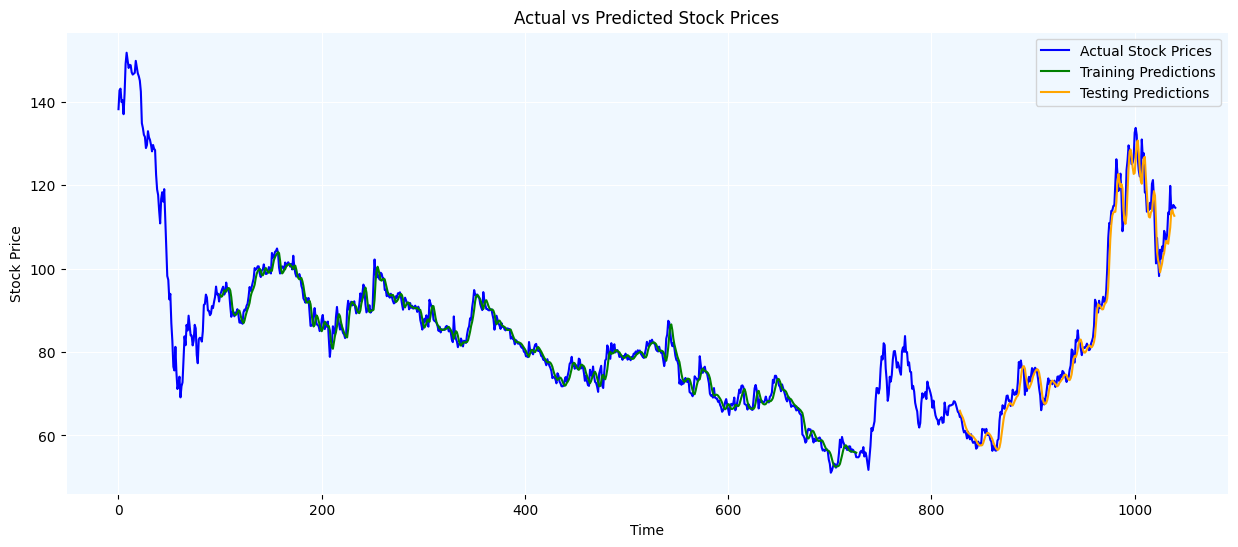

In [ ]:
# Plotting
plt.rcParams['axes.facecolor'] = 'aliceblue'
plt.rc('axes',edgecolor='white')
# Shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(15, 6))  # Set the figure size for better visualization
plt.plot(scaler.inverse_transform(df1), label='Actual Stock Prices', color='blue')
plt.plot(trainPredictPlot, label='Training Predictions', color='green')
plt.plot(testPredictPlot, label='Testing Predictions', color='orange')
plt.grid(color='white')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()  # Add legend for better interpretation
plt.show()


In [74]:
len(test_data)

313

In [75]:
# Previous 100 days
x_input=test_data[213:].reshape(1,-1)
x_input.shape

(1, 100)

In [76]:
# Creating a list and taking all the values from it
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [77]:
temp_input

[0.2622804406073237,
 0.3165624689887865,
 0.3126922695246602,
 0.33908901458767493,
 0.3142800436637889,
 0.31169991068770475,
 0.29552446164533097,
 0.27994442790513063,
 0.2945321028083756,
 0.2983030663888063,
 0.29731070755185085,
 0.3008831993648905,
 0.3073335318051008,
 0.3013793787833682,
 0.29175349806490036,
 0.2934405080877247,
 0.3067381165029275,
 0.31378386424531124,
 0.3222189143594324,
 0.3499057259104893,
 0.4119281532202045,
 0.40518011312890745,
 0.394164930038702,
 0.3813635010419769,
 0.40944725612781596,
 0.391783268830009,
 0.39476034534087534,
 0.40220303661804113,
 0.41897390096258813,
 0.40756177433760066,
 0.40408851840825644,
 0.43336310409844203,
 0.48615659422447177,
 0.55879726108961,
 0.5947206509873971,
 0.5920412821276174,
 0.6232013496080183,
 0.6242929443286692,
 0.6350104197677883,
 0.6360027786047436,
 0.6918725811253349,
 0.7463530812741889,
 0.7146968343753101,
 0.6707353378981841,
 0.6879031457775132,
 0.7121167013992261,
 0.662697231318845,
 0

In [78]:
# demonstrate prediction for next 15 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<15):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.6088347]
101
1 day input [0.31656247 0.31269227 0.33908901 0.31428004 0.31169991 0.29552446
 0.27994443 0.2945321  0.29830307 0.29731071 0.3008832  0.30733353
 0.30137938 0.2917535  0.29344051 0.30673812 0.31378386 0.32221891
 0.34990573 0.41192815 0.40518011 0.39416493 0.3813635  0.40944726
 0.39178327 0.39476035 0.40220304 0.4189739  0.40756177 0.40408852
 0.4333631  0.48615659 0.55879726 0.59472065 0.59204128 0.62320135
 0.62429294 0.63501042 0.63600278 0.69187258 0.74635308 0.71469683
 0.67073534 0.68790315 0.7121167  0.66269723 0.57497271 0.59670537
 0.59531607 0.63491118 0.72055175 0.74387218 0.77939863 0.76590255
 0.75796368 0.73464325 0.73791803 0.75002481 0.80956634 0.8210777
 0.80450531 0.75022328 0.72025404 0.7054679  0.7068572  0.79349013
 0.75042175 0.76064305 0.66716285 0.66736132 0.62151434 0.62359829
 0.62518607 0.64255235 0.62806391 0.68780391 0.69683438 0.65227746
 0.56534683 0.49836261 0.5588965  0.51007244 0.4681949  0.53081274
 0.50947703 0.53855314 0.52803414 0

**Logic Explained**

1. lst_output is initialized as an empty list to store the predicted values.
2. A while loop runs until 15 days of predictions are obtained.
3. Inside the loop, it checks if the length of temp_input (the input sequence) is greater than 100.
* If true, it predicts the next day's stock price based on the last 100 days of data.
* The input sequence is updated by removing the first element and adding the predicted value.
* The predicted value is added to the lst_output.
* The loop counter is incremented.
* If false, it predicts the next day's stock price based on the available data.
* The predicted value is added to temp_input.
* The loop counter is incremented.

The loop continues until 15 days of predictions are obtained. The predicted values are stored in lst_output. The model is fed with its own predictions in subsequent iterations, simulating a forecasting scenario.

In [79]:
# previous 100 days
day_new=np.arange(1,101)
# predicted 15 days
day_pred=np.arange(101,116)

In [ ]:
len(df1)

1041

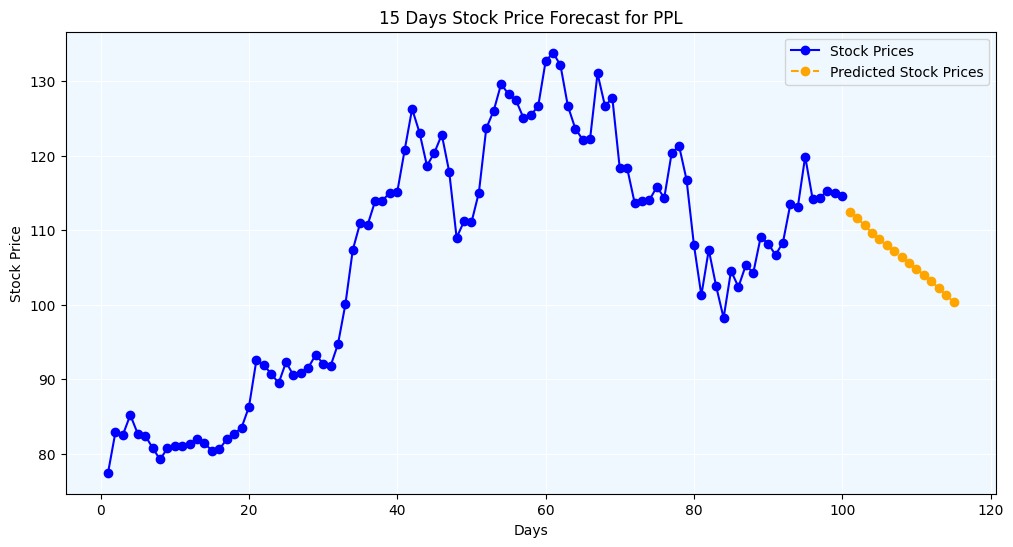

In [80]:
# Plotting
plt.figure(figsize=(12, 6))
plt.rcParams['axes.facecolor'] = 'aliceblue'
plt.grid(color='white')
plt.rc('axes',edgecolor='white')
# Actual stock prices
plt.plot(day_new, scaler.inverse_transform(df1[941:]), label='Stock Prices', color='blue', marker='o')

# Future predicted prices
plt.plot(day_pred, scaler.inverse_transform(lst_output), label='Predicted Stock Prices', linestyle='dashed', color='orange', marker='o')

# Add labels and title
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('15 Days Stock Price Forecast for PPL')

# Add legend
plt.legend()

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()

The Stock Price for the next 15 days of Pakistan Petroleum Limited will decrease from Rs.115 to Rs.100 approx.

# THE END